### Exploratory Data Analysis_Assignment

Further Cleaning of the flight dataset before utilizing it in this assignment:
I did a total cleaning

In [3]:
## Datacleaning
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [213]:
dataset=pd.read_excel('flight_price.xlsx')
dataset.info()

### The data needed to be cleaned and engineered

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [214]:
dataset.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [215]:
## Feature Engineering
dataset['Date']=dataset['Date_of_Journey'].str.split('/').str[0]
dataset['Month']=dataset['Date_of_Journey'].str.split('/').str[1]
dataset['Year']=dataset['Date_of_Journey'].str.split('/').str[2]

In [216]:
### change Data type

dataset['Date']=dataset['Date'].astype(int)
dataset['Month']=dataset['Month'].astype(int)
dataset['Year']=dataset['Year'].astype(int)

In [217]:
## splitting the date
dataset['Arrival_Time']=dataset['Arrival_Time'].apply(lambda x:x.split(' ')[0])
dataset['Arrival_hour']=dataset['Arrival_Time'].str.split(':').str[0]
dataset['Arrival_min']=dataset['Arrival_Time'].str.split(':').str[1]

### Channging the datatype

dataset['Arrival_hour']=dataset['Arrival_hour'].astype("int")
dataset['Arrival_min']=dataset['Arrival_min'].astype("int")

In [218]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int32 
 12  Month            10683 non-null  int32 
 13  Year             10683 non-null  int32 
 14  Arrival_hour     10683 non-null  int32 
 15  Arrival_min      10683 non-null  int32 
dtypes: int32(5), int64(1), object(10)
memory usage: 1.1+ MB


In [219]:
dataset.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [220]:
# Drop columns that are not needed again
dataset.drop('Arrival_Time',axis=1,inplace=True)

In [221]:
### Deleting columns
dataset.drop('Route',axis=1,inplace=True)
dataset.drop('Date_of_Journey',axis=1,inplace=True)

In [222]:
dataset.head(2)

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [223]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Dep_Time         10683 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int32 
 9   Month            10683 non-null  int32 
 10  Year             10683 non-null  int32 
 11  Arrival_hour     10683 non-null  int32 
 12  Arrival_min      10683 non-null  int32 
dtypes: int32(5), int64(1), object(7)
memory usage: 876.5+ KB


In [224]:
### Working on departure Time

dataset['Dep_Time_hour']=dataset['Dep_Time'].str.split(':').str[0]
dataset['Dep_Time_min']=dataset['Dep_Time'].str.split(':').str[1]

dataset.drop("Dep_Time", axis=1, inplace = True)

In [225]:
dataset['Dep_Time_hour']=dataset['Dep_Time_hour'].astype(int)
dataset['Dep_Time_min']=dataset['Dep_Time_min'].astype(int)

In [226]:
dataset.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [227]:
### work with duration 

dataset["Duration_Hr"] = dataset["Duration"].str.split(" ").str[0].str.replace("h", "")

dataset["Duration_min"] = dataset["Duration"].str.split(" ").str[1].str.replace("m", "")




In [228]:
dataset.drop("Duration", axis = 1, inplace = True)

In [229]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Total_Stops      10682 non-null  object
 4   Additional_Info  10683 non-null  object
 5   Price            10683 non-null  int64 
 6   Date             10683 non-null  int32 
 7   Month            10683 non-null  int32 
 8   Year             10683 non-null  int32 
 9   Arrival_hour     10683 non-null  int32 
 10  Arrival_min      10683 non-null  int32 
 11  Dep_Time_hour    10683 non-null  int32 
 12  Dep_Time_min     10683 non-null  int32 
 13  Duration_Hr      10683 non-null  object
 14  Duration_min     9651 non-null   object
dtypes: int32(7), int64(1), object(7)
memory usage: 959.9+ KB


In [230]:
dataset[~dataset["Duration_Hr"].str.isnumeric()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_Time_hour,Dep_Time_min,Duration_Hr,Duration_min
6474,Air India,Mumbai,Hyderabad,2 stops,No info,17327,6,3,2019,16,55,16,50,5m,NaN


In [231]:
### Droping that colunm
dataset.drop(index = 6474, inplace=True)


In [232]:
dataset[~dataset["Duration_Hr"].str.isnumeric()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_Time_hour,Dep_Time_min,Duration_Hr,Duration_min


In [233]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Total_Stops      10681 non-null  object
 4   Additional_Info  10682 non-null  object
 5   Price            10682 non-null  int64 
 6   Date             10682 non-null  int32 
 7   Month            10682 non-null  int32 
 8   Year             10682 non-null  int32 
 9   Arrival_hour     10682 non-null  int32 
 10  Arrival_min      10682 non-null  int32 
 11  Dep_Time_hour    10682 non-null  int32 
 12  Dep_Time_min     10682 non-null  int32 
 13  Duration_Hr      10682 non-null  object
 14  Duration_min     9651 non-null   object
dtypes: int32(7), int64(1), object(7)
memory usage: 1.0+ MB


In [234]:
dataset["Duration_min"] = dataset["Duration_min"].fillna("0")

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_Time_hour,Dep_Time_min,Duration_Hr,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,4,2019,22,25,19,55,2,30
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,4,2019,23,20,20,45,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,4,2019,11,20,8,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,1,3,2019,14,10,11,30,2,40


In [235]:
dataset.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_Time_hour,Dep_Time_min,Duration_Hr,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25


In [237]:
### changing data type
dataset["Duration_Hr"] = dataset["Duration_Hr"].astype("int")

dataset["Duration_min"] = dataset["Duration_min"].astype("int")


In [238]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Total_Stops      10681 non-null  object
 4   Additional_Info  10682 non-null  object
 5   Price            10682 non-null  int64 
 6   Date             10682 non-null  int32 
 7   Month            10682 non-null  int32 
 8   Year             10682 non-null  int32 
 9   Arrival_hour     10682 non-null  int32 
 10  Arrival_min      10682 non-null  int32 
 11  Dep_Time_hour    10682 non-null  int32 
 12  Dep_Time_min     10682 non-null  int32 
 13  Duration_Hr      10682 non-null  int32 
 14  Duration_min     10682 non-null  int32 
dtypes: int32(9), int64(1), object(5)
memory usage: 959.7+ KB


In [242]:
# missing data imputation
dataset["Total_Stops"].mode()


0    1 stop
Name: Total_Stops, dtype: object

In [250]:
dataset["Total_Stops"] = dataset["Total_Stops"].fillna("1 stop")

In [252]:
dataset[dataset["Total_Stops"].isnull()]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_Time_hour,Dep_Time_min,Duration_Hr,Duration_min


### Saving the Clean Data for Flight Price

In [257]:
### storing the clean data
dataset.to_csv('flightprice_cleaned.csv', index_label=False)

In [258]:
df_flight_clean = pd.read_csv('flightprice_cleaned.csv')
df_flight_clean.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_Time_hour,Dep_Time_min,Duration_Hr,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,4,25,9,25,19,0


### Question 1

Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

__Answer__

In [262]:
## This for a the unclean dataset
dataset=pd.read_excel('flight_price.xlsx')
# df.shape
print("{} Rows and {} columns ".format(dataset.shape[0], dataset.shape[1]))

10683 Rows and 11 columns 


In [261]:
### For the clean set
df_flight_clean = pd.read_csv('flightprice_cleaned.csv')
# df_flight_clean.shape
print("{} Rows and {} columns ".format(df_flight_clean.shape[0], df_flight_clean.shape[1]))

10682 Rows and 15 columns 


In [34]:
print("{} Rows and {} columns ".format(dataset.shape[0], dataset.shape[1]))

10683 Rows and 11 columns 


### Question 2

Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.

__Answer__

The distribution is __righ skewed__ as majority of the dataset fall between 0 to 20000

* check below for the distribtion


In [35]:
dataset.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

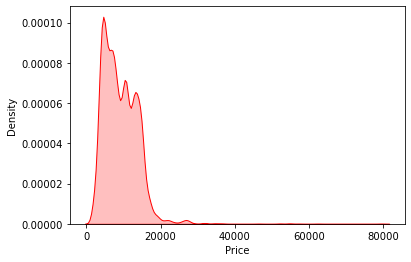

In [37]:
### creating histogram

sns.kdeplot(x=dataset['Price'], shade=True, color='r')
plt.xlabel("Price")
plt.show()

### Question 3

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

__Answer__

In [263]:
### Range

price_range = np.ptp(dataset.Price)    ### To get range!!!!

### min and max

price_min = dataset.Price.min()
price_max = dataset.Price.max()

### output

print("Price range: {}, Price Min: {}, Price Max: {}".format(price_range, price_min, price_max))

Price range: 77753, Price Min: 1759, Price Max: 79512


In [264]:
### For double confirmation
price_max-price_min

77753

### Question 4

Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

__Answer__

I followed these procedures to answer this questions:

1. Calculated the median price for each airlines
2. Then compare the median with each other

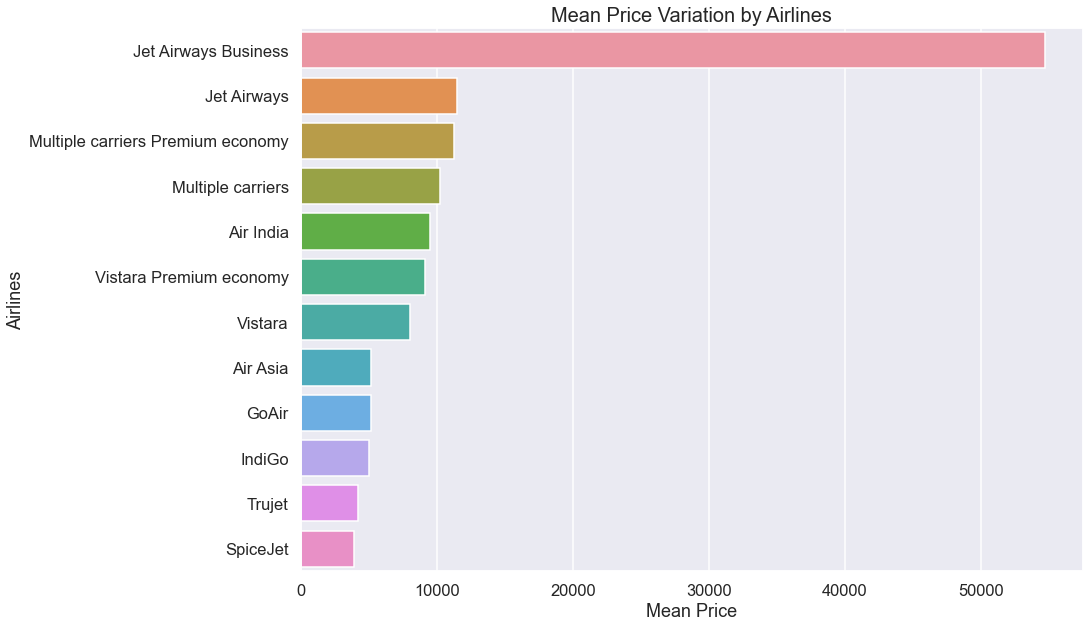

In [80]:
### Group and get using median incase there is outliers
comp_airlinebyprice = dataset.groupby(["Airline"])["Price"].median().sort_values(ascending = False).reset_index()
# comp_airlinebyprice

plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")

ax = sns.barplot(x = 'Price' , y = 'Airline' , data = comp_airlinebyprice )
ax.set_xlabel('Mean Price')
ax.set_ylabel('Airlines')
ax.set_title("Mean Price Variation by Airlines", size = 20)
plt.show()



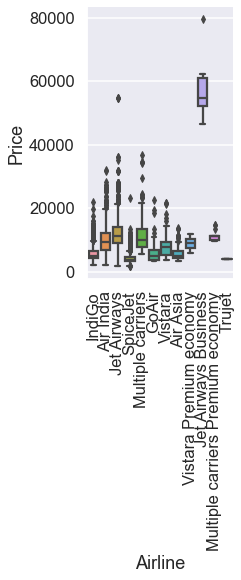

In [81]:
##categorical Plot
plt.figure(figsize=(4, 30))
sns.catplot(x='Airline', y='Price', data=dataset, kind="box")
plt.xticks(rotation=90)
plt.show()

###  Insight
1. flight prices vary by airline with Jetways Business having the highest all the way down to SpiceJet having the least price
2. The second graph shows the second that there are outliers in all the price categoried by airline

### Question 5

Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

__Answer__

1. I checked the dataset details using describe to check for outliers for the numberic data.
2. The run boxplot on all the data

Note: I am using the clean data to run this!!!

In [265]:
df_flight_clean.describe()

,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_Time_hour,Dep_Time_min,Duration_Hr,Duration_min
count,10682.000000,10682.000000,10682.000000,10682.0,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,9086.292735,13.509081,4.708762,2019.0,13.348530,24.687793,12.490358,24.408819,10.247051,28.329901
std,4610.885695,8.479363,1.164294,0.0,6.859398,16.504203,5.748819,18.767225,8.495234,16.944689
min,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5277.000000,6.000000,3.000000,2019.0,8.000000,10.000000,8.000000,5.000000,2.000000,15.000000
50%,8372.000000,12.000000,5.000000,2019.0,14.000000,25.000000,11.000000,25.000000,8.000000,30.000000
75%,12373.000000,21.000000,6.000000,2019.0,19.000000,35.000000,18.000000,40.000000,15.000000,45.000000
max,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


In [272]:
numeric_features = [feature for feature in df_flight_clean.columns if df_flight_clean[feature].dtype !="O"]

categories_features = [feature for feature in df_flight_clean.columns if df_flight_clean[feature].dtype =="O"]

print(f"{numeric_features},\n{categories_features}")


['Price', 'Date', 'Month', 'Year', 'Arrival_hour', 'Arrival_min', 'Dep_Time_hour', 'Dep_Time_min', 'Duration_Hr', 'Duration_min'],
['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']


In [278]:
categories_features

['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']

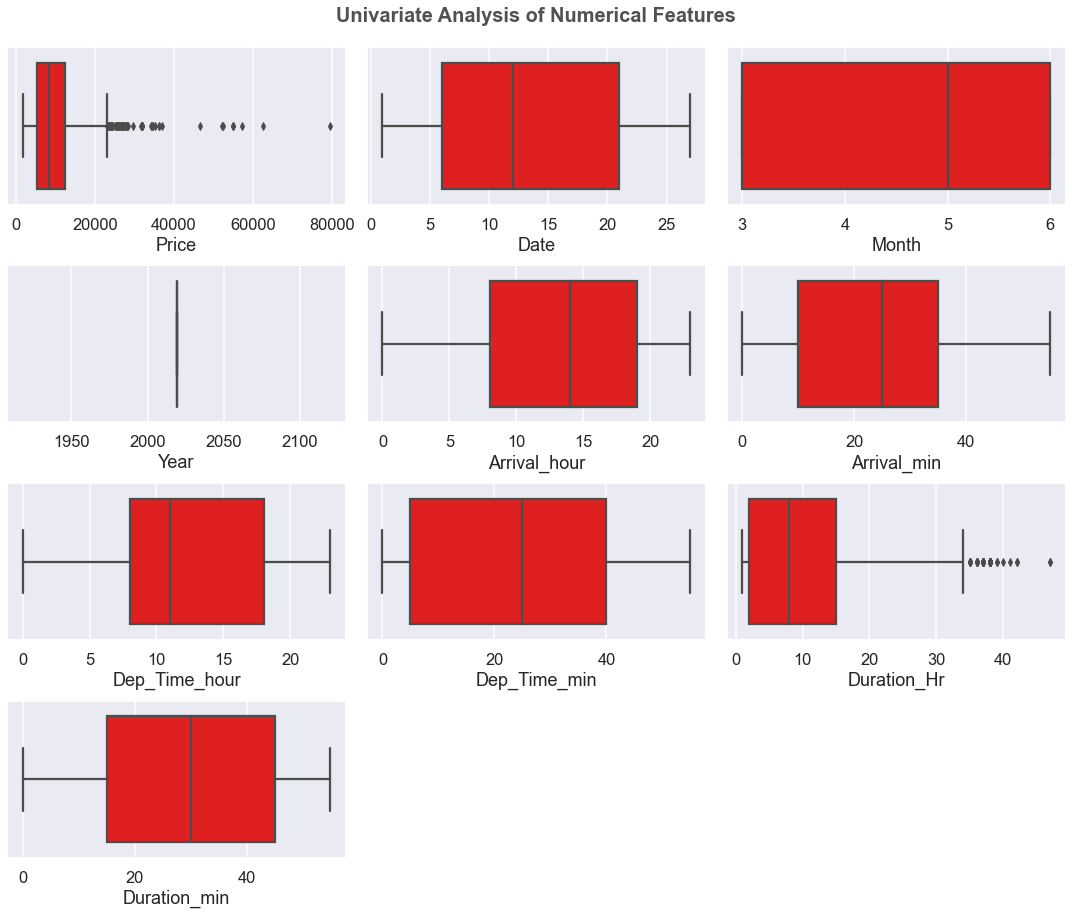

In [274]:
## For the numeric
## Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df_flight_clean[numeric_features[i]],color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [277]:
###count for categorical column

df_flight_clean[categories_features]



,Airline,Source,Destination,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,non-stop,No info
1,Air India,Kolkata,Banglore,2 stops,No info
2,Jet Airways,Delhi,Cochin,2 stops,No info
3,IndiGo,Kolkata,Banglore,1 stop,No info
4,IndiGo,Banglore,New Delhi,1 stop,No info
...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info
10679,Air India,Kolkata,Banglore,non-stop,No info
10680,Jet Airways,Banglore,Delhi,non-stop,No info
10681,Vistara,Banglore,New Delhi,non-stop,No info


In [293]:
categories_features[0]

'Airline'

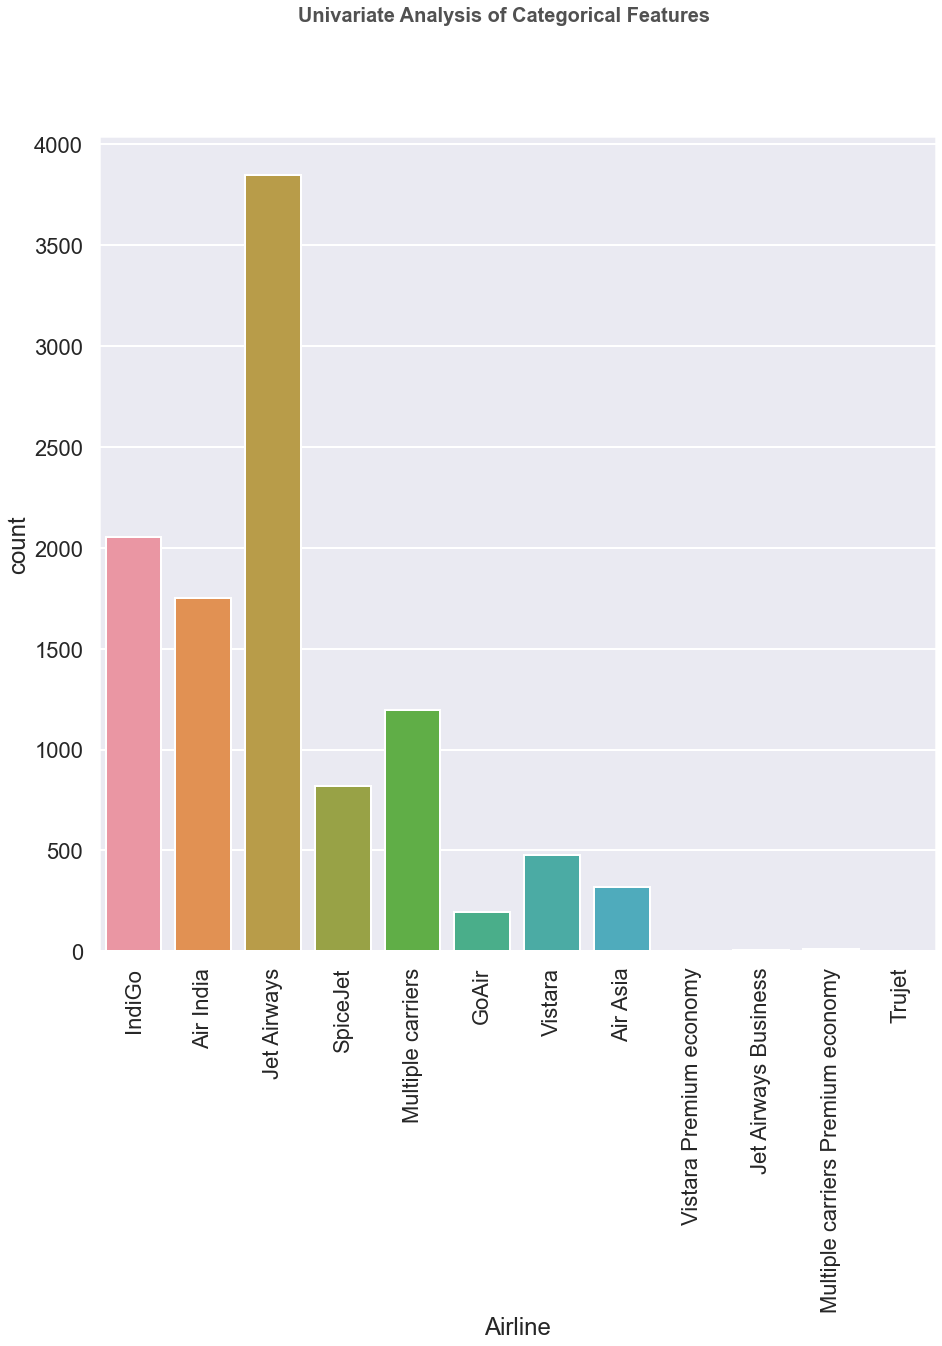

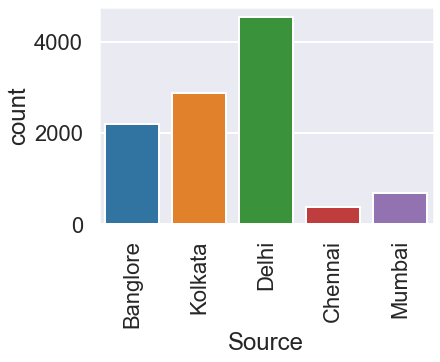

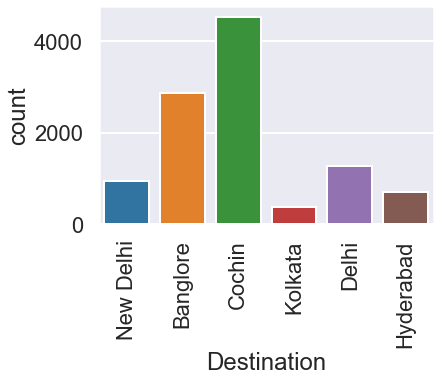

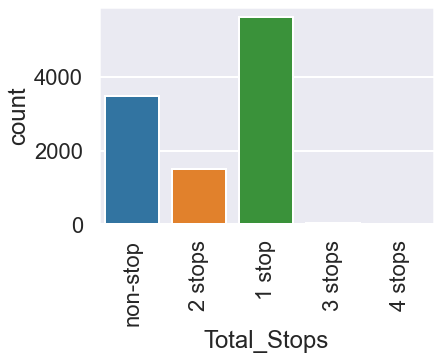

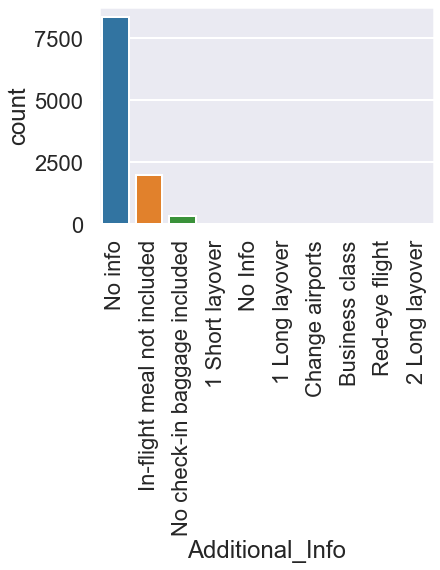

<Figure size 432x288 with 0 Axes>

In [357]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.set_context("poster")
sns.set_style("darkgrid")


for i in range(0, len(categories_features)):
#     plt.subplot(3, 2, i+1)
    sns.countplot(data = df_flight_clean, x = categories_features[i])
    plt.xticks(rotation=90)
    plt.show()
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

### Insight

1. From the boxplot only Prices and Duration after feature engineering had outliers.

Below are what the effect of outliers in a dataset:

* Outliers skew the distribution of the data and affect the performance of machine learning algorithms
* Outliers distort the overall distribution of the data, making it difficult for machine learning algorithms to identify meaningful patterns

### Question 6
Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

__Answer__

To understand the peak season I will would analysis these features:
1. Year    #### The year was same 2019, so no need use this!!!
2. Month   

__Finding__
I would present my finding using pie chart with percentage to show the month.

In [300]:
df_flight_clean.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Date', 'Month', 'Year', 'Arrival_hour', 'Arrival_min',
       'Dep_Time_hour', 'Dep_Time_min', 'Duration_Hr', 'Duration_min'],
      dtype='object')

In [301]:
df_flight_clean.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dep_Time_hour,Dep_Time_min,Duration_Hr,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,21,35,16,50,4,45


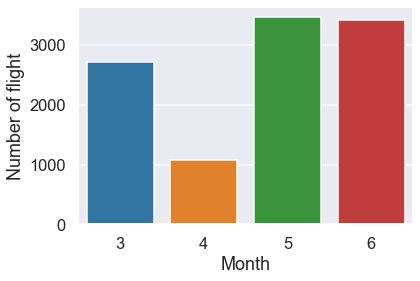

In [308]:
### Plotting the months with the highest count
sns.countplot(data = df_flight_clean, x = "Month")
plt.ylabel("Number of flight")
plt.title("")
plt.show()

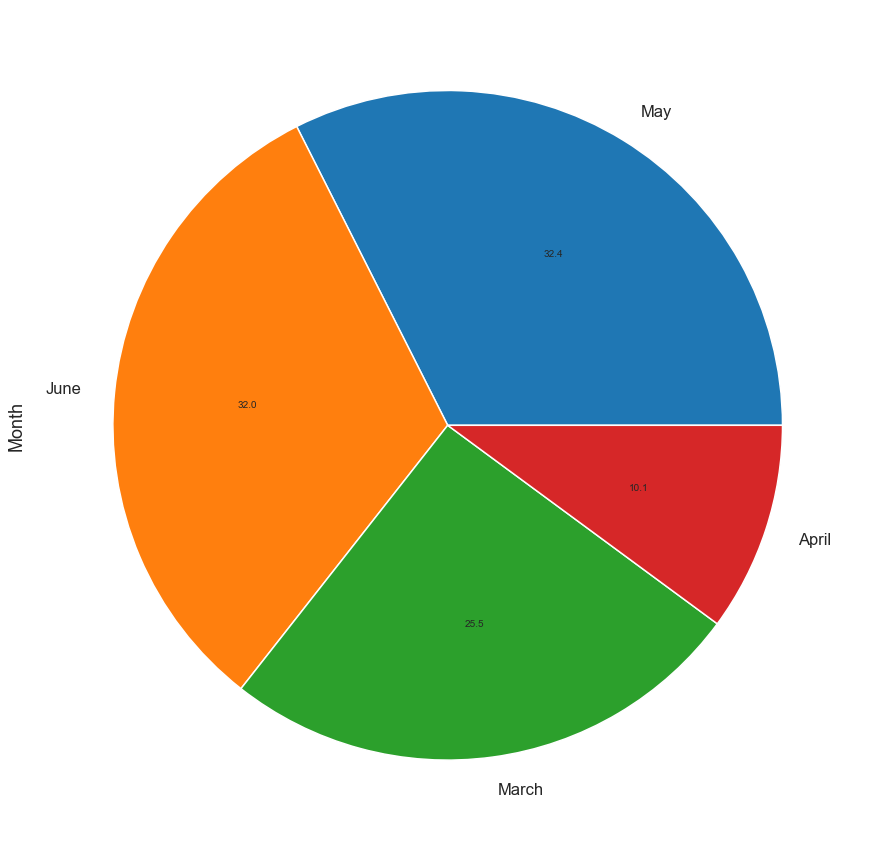

In [336]:
# for the visualisation map month name to the numbers

df_fcopy = df_flight_clean.copy()
df_fcopy['Month'] = df_fcopy['Month'].map({3:"March", 4:"April", 5:"May", 6:"June"})


df_fcopy['Month'].value_counts().plot.pie(y=df_fcopy['Month'],figsize=(15,16),autopct='%1.1f')
plt.show()


### Insight

* All the flight fall between March to June 2019
* The season with the highest flight is May and June as both percentage were very close
* The month with least flight is April


### Question 7

Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

__Answer__

These are features I will analyse, will plot them agains prices:
#### Categorical variables
1. Airline: to check how price fluctuate with type of airline
2. Group Source and Destination
3. Total_Stops

#### Numerical variables
1. Month
2. Group Duration and Duration min
3. Date

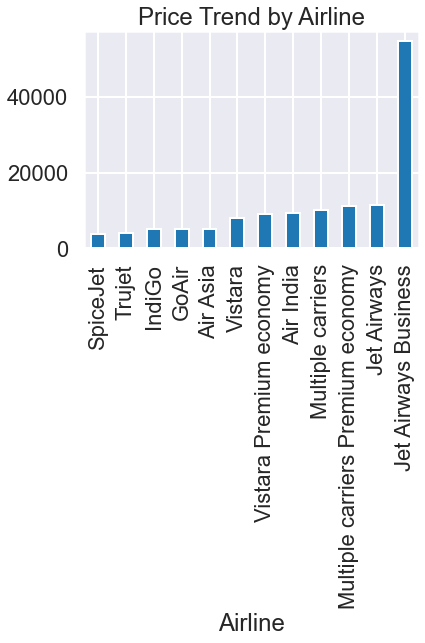

In [367]:
### for Airline categorical
df_flight_clean.groupby(["Airline"])['Price'].median().sort_values().plot.bar()
plt.title("Price Trend by Airline")
plt.show()

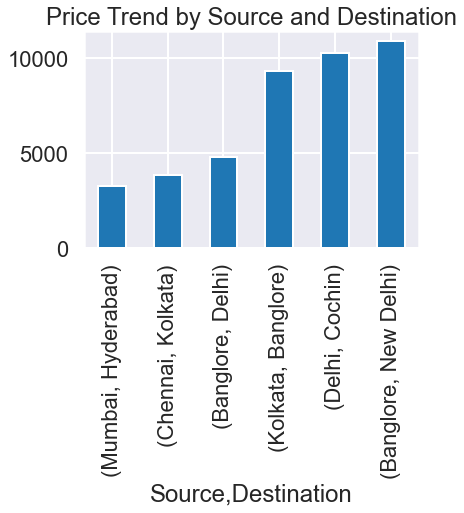

In [363]:
### for Source-Destination categorical
df_flight_clean.groupby(["Source", "Destination"])['Price'].median().sort_values().plot.bar()
plt.title("Price Trend by Source and Destination")
plt.show()


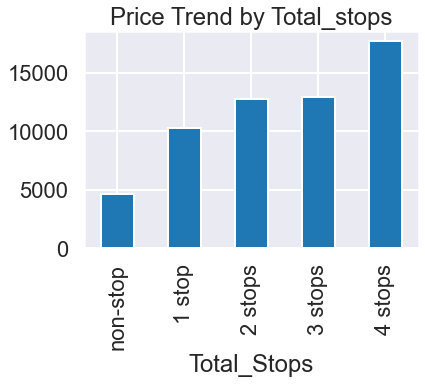

In [365]:
### for Total stops categorical
df_flight_clean.groupby(["Total_Stops"])['Price'].median().sort_values().plot.bar()
plt.title("Price Trend by Total_stops")
plt.show()

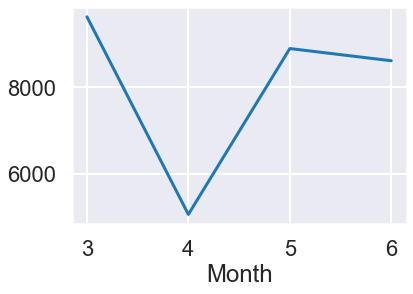

In [370]:
### for numeric variable trend I will either use line or scatter plot for the trends

# for Month

df_flight_clean.groupby(["Month"])["Price"].median().plot()
plt.show()

# plt.scatter(data = df_flight_clean, x = "Month", y = "Price")





<AxesSubplot:xlabel='Duration_Hr,Duration_min'>

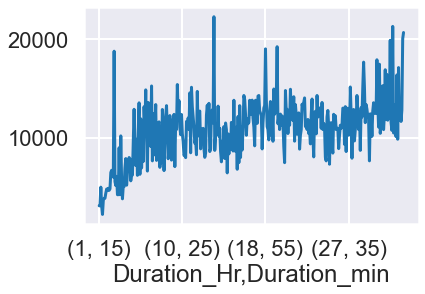

In [374]:
## for combined duration hour and min

df_flight_clean.groupby(["Duration_Hr", "Duration_min"])["Price"].median().plot()

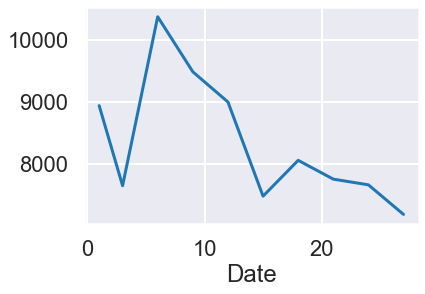

In [376]:
## for combined duration hour and min

df_flight_clean.groupby(["Date"])["Price"].median().plot()
plt.show()

### Insight

* while other features considered showed and increasing trend with price of flight, __Date__ feature picked at the beginning of the month and decline towards the ending on the month

* Price of flight drop in 4 month, picks in the 5 month and decline a little in the month that preceeds it
* there is an extreme difference in price of flight of a particular airline - Jet Airway Business compare to other a ways
* Price of flight increases with increasing number of stops


### Question 8

Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

__Answer__

As a data scientist, I would analyse the following features:
1. Airline: There is possibility that type of airline could affect price
2. Date of Journey: Season of the year can potentially affect prices
3. Source and Destination: This could also affect price base on distance
4. Duration: Flight duration can potentially affect the price of flight
5. Total_stops: Number of stops to can also have effect.

I would present my findings to my team using following visualization to present my findings:

1. Would use correlation matrix, using heatmap to show features correation visually.

### Google Playstore Dataset:

### Question 9
Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

__Answer__
Read the data from this URl == https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv

In [4]:
#loading the dataset, read the data from url
g_dataset = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
# g_dataset.head()
g_dataset.shape

(10841, 13)

In [5]:
# Output
print("Number of rows is: {}".format(g_dataset.shape[0]))


Number of rows is: 10841


### Question 10
Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.
__Answer__

I imported the cleaned google data from the class

In [84]:
googclean = pd.read_csv("google_cleaned.csv")
googclean.drop("Unnamed: 0", axis=1, inplace = True)
googclean.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


In [85]:
googclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  Day             10840 non-null  int64  
 14  Month           10840 non-null  int64  
 15  Year            10840 non-null  int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 1.3+ MB


In [82]:
googclean.drop("Unnamed: 0", axis=1, inplace = True)


In [86]:
# checking for count of unique 
googclean["Category"].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

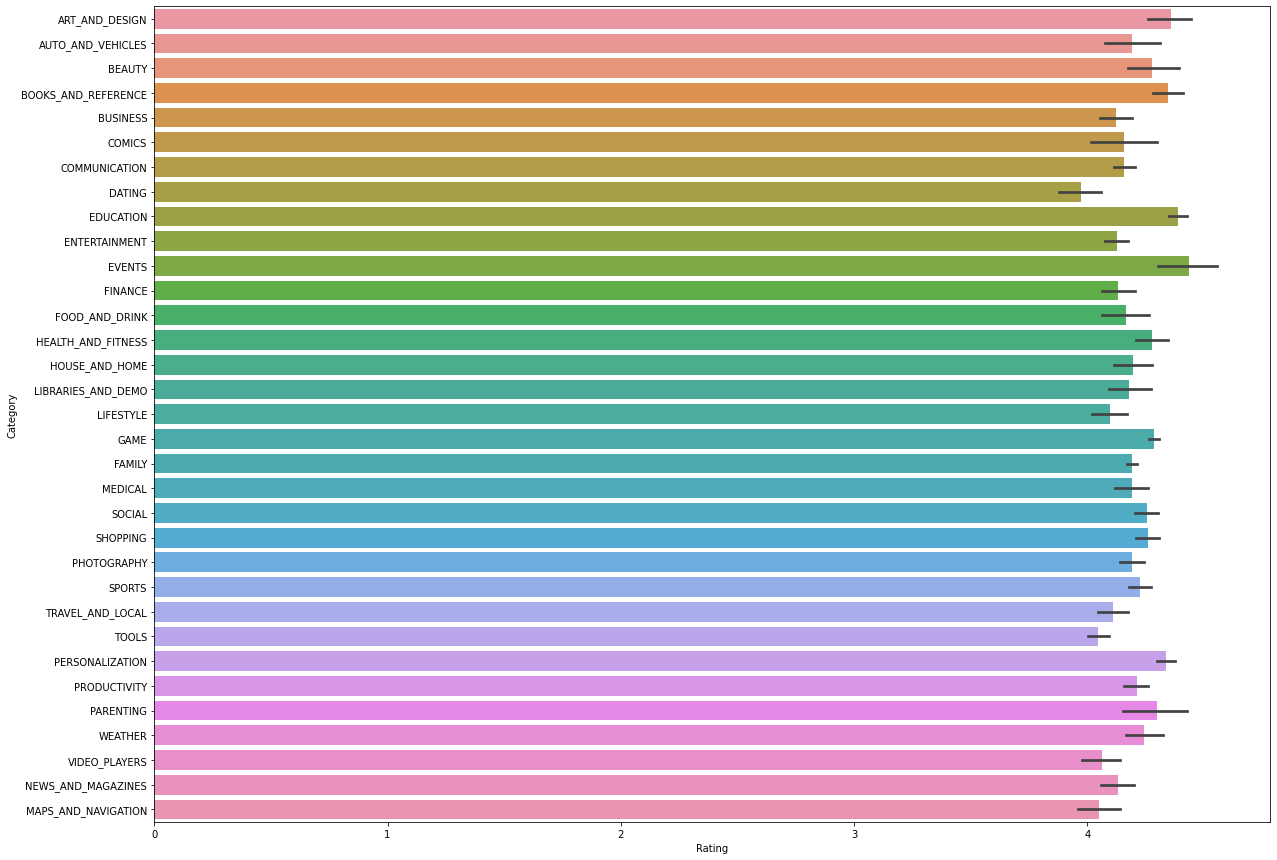

In [87]:
## compare category by rating
plt.figure(figsize=(20, 15))
sns.barplot(data = googclean, x = "Rating", y = "Category")
plt.show()

### Question 11
Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.
__Answer__

In [89]:
googclean.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Day                  0
Month                0
Year                 0
dtype: int64

### Insight

Yes, there are missing values in the following features:
1. Rating
2. Type == just one can be deleted with no effect
3. Current Ver
4. Android Ver

Since rating is the target features, this missing values can influence the result in the following way:

* lead to bias or in correct result/conclusion/insights


### Question 12
Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.
__Answer__

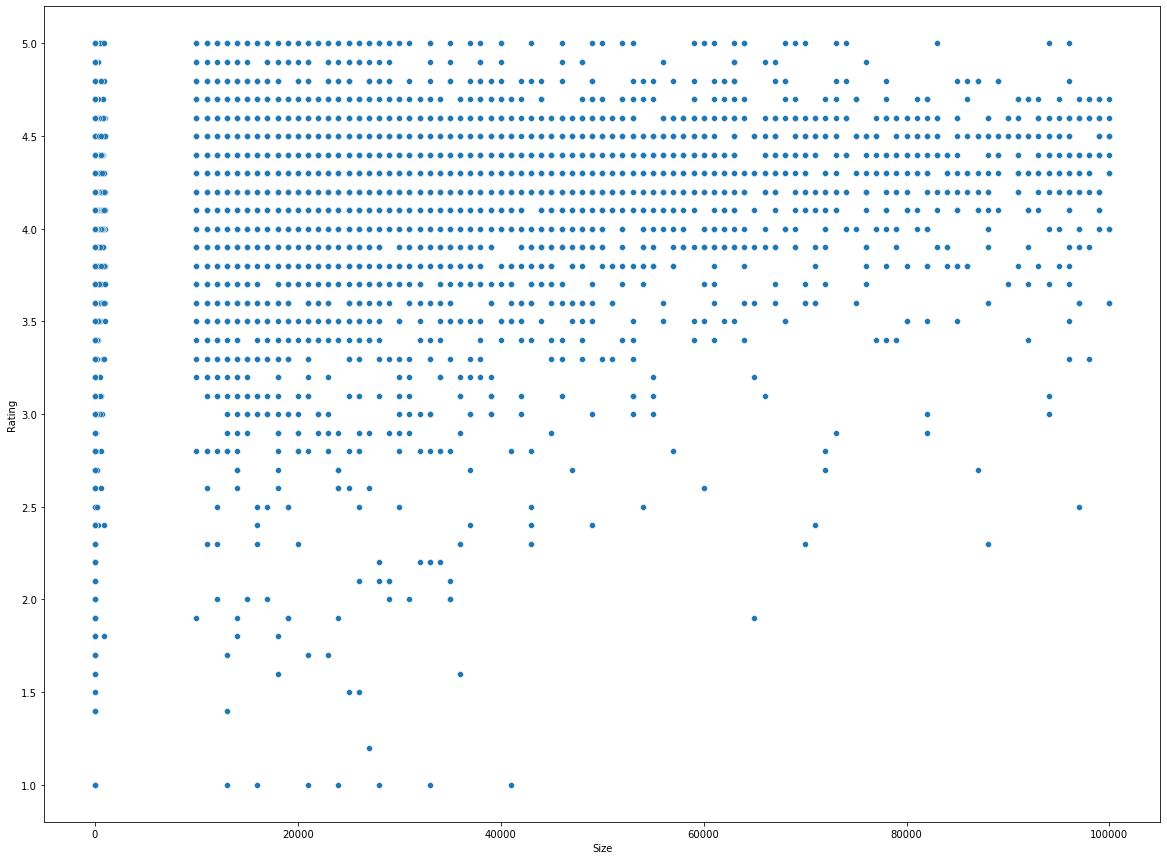

In [90]:

plt.figure(figsize=(20, 15))
sns.scatterplot(data = googclean, x = "Size", y = "Rating")
plt.show()

### Insight
1. small size highly rated app have more downloads 
2. large size app have minimal download and associated to high rated apps

### Question 13
Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.
__Answer__

In [106]:
googclean.groupby(["Type"])["Price"].mean()

Type
Free     0.000000
Paid    13.920837
Name: Price, dtype: float64

In [105]:
## To Double check that free has zero price tags
googclean[googclean["Type"] == "Free"]["Price"].mean()

0.0

<AxesSubplot:xlabel='Type'>

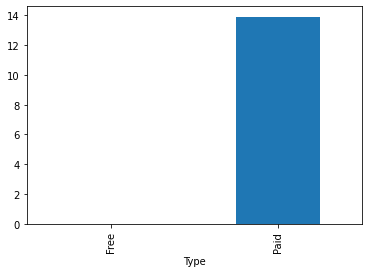

In [110]:
## firstly remove
nanrm_data = googclean[~googclean["Type"].isnull()]

nanrm_data.groupby(["Type"])["Price"].mean().plot.bar()

### Insight

1. Free apps have no association with price as aspected

### Question 14

Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

__Answer__

The highest downloaded app is __Subway Surfers__

In [111]:
googclean.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Day', 'Month', 'Year'],
      dtype='object')

In [126]:
App_inst_sort = googclean.groupby(["App"])["Installs"].sum().sort_values(ascending=False).reset_index()[:10]
App_inst_sort

,App,Installs
0,Subway Surfers,6000000000
1,Google News,4000000000
2,Hangouts,4000000000
3,Google Drive,4000000000
4,Google Photos,4000000000
5,Instagram,4000000000
6,Candy Crush Saga,3500000000
7,Maps - Navigate & Explore,3000000000
8,Google Chrome: Fast & Secure,3000000000
9,WhatsApp Messenger,3000000000


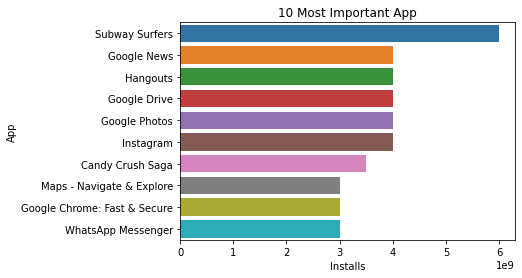

In [128]:
### barplot
sns.barplot(data = App_inst_sort, x="Installs", y="App")
plt.title("10 Most Important App")
plt.show()

### Question 15
Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

__Answer__

I would analyse Category base numbers of installation to determine the most installed apps category then decisions can be make base on the recommendation:

Firstly, I will group installation by categories and take the sum of the installation in groups of category. 

Secondly, sort the data base on installation count and select the first 10 rows and present the data using barplot(visualisation)

In [129]:
Cat_inst_sort = googclean.groupby(["Category"])["Installs"].sum().sort_values(ascending=False).reset_index()[:10]
Cat_inst_sort


,Category,Installs
0,GAME,35086024415
1,COMMUNICATION,32647276251
2,PRODUCTIVITY,14176091369
3,SOCIAL,14069867902
4,TOOLS,11452771915
5,FAMILY,10258263505
6,PHOTOGRAPHY,10088247655
7,NEWS_AND_MAGAZINES,7496317760
8,TRAVEL_AND_LOCAL,6868887146
9,VIDEO_PLAYERS,6222002720


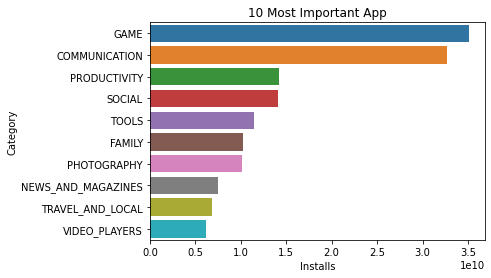

In [130]:
### barplot
sns.barplot(data = Cat_inst_sort, x="Installs", y="Category")
plt.title("10 Most Important App")
plt.show()

### Question 16

Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

__Answer__

I would analysis the following features:

1. App
2. Category
3. Install
4. Rating

I would present the using barplot

In [148]:
googclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  Day             10840 non-null  int64  
 14  Month           10840 non-null  int64  
 15  Year            10840 non-null  int64  
dtypes: float64(3), int64(5), object(8)
memory usage: 1.3+ MB


In [153]:
### pull out the one with the higehst rating
high_rating = googclean.groupby(["App", "Category", "Installs"])["Rating"].mean().sort_values(ascending=False).reset_index()

### select the highly rated 0.5
high_rating = high_rating[high_rating["Rating"] == 5.0]
high_rating

,App,Category,Installs,Rating
0,Movement BE,SOCIAL,100,5.0
1,Free coupons and vouchers,FINANCE,100,5.0
2,CJ'S TIRE AND AUTO INC.,PRODUCTIVITY,100,5.0
3,CJ's Coffee Cafe,TRAVEL_AND_LOCAL,500,5.0
4,CK Employee Portal,BUSINESS,1000,5.0
...,...,...,...,...
266,DG OFF - 100% Free Coupons & Deals,SHOPPING,10,5.0
267,DC N COMPANY ENTERTAINMENT RADIO!,FAMILY,100,5.0
268,EP Church Annapolis,LIFESTYLE,100,5.0
269,DH-UFO,FAMILY,100,5.0


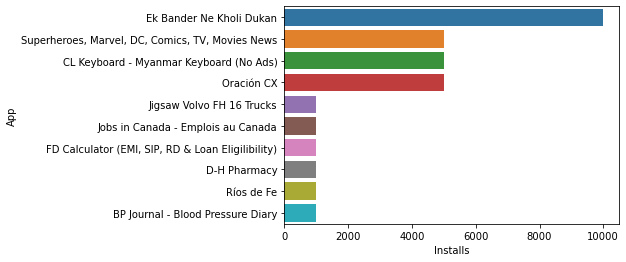

In [168]:
### use installation to pick out the best developer
high_rating = high_rating.sort_values(by = "Installs", ascending=False)
# print(high_rating)


## select the first 10 most installed and highly rated
sns.barplot(data = high_rating[:10], y = "App", x = "Installs")
plt.title("")
plt.show()


### Insight

The most successful developer were for __Ek Bander Ne Kholi Dukan__ and falls in the category for __Family__ and has __10000__

### Question 17

Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

__Answer__

I would analyse the month to make the recommendation to the company and would use pie chart to present my findings.



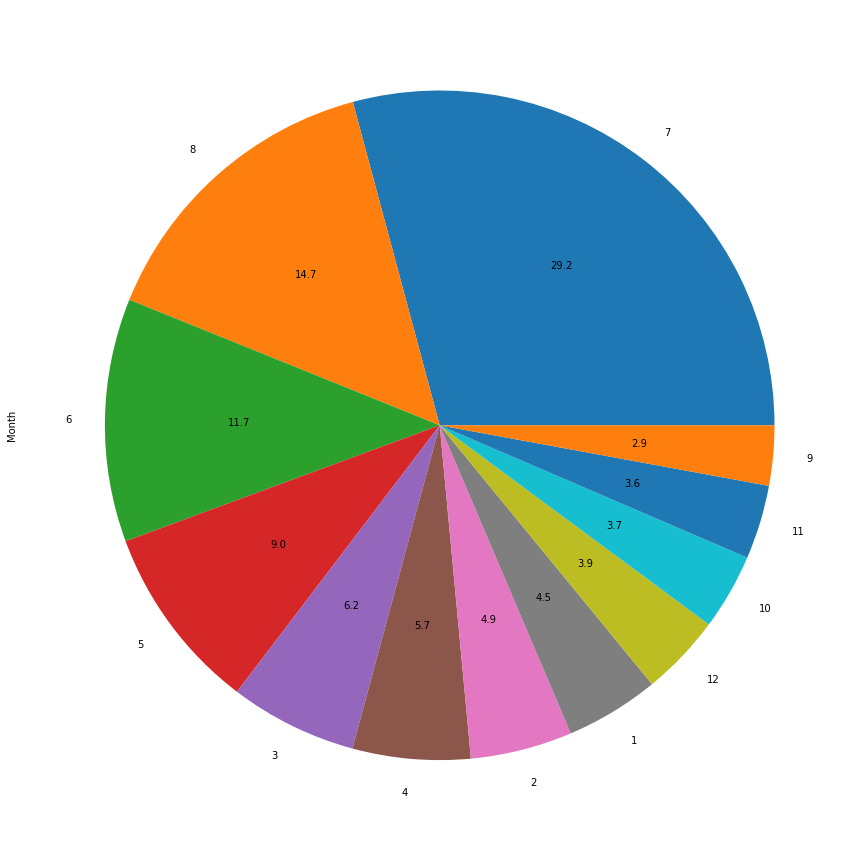

In [182]:
googclean['Month'].value_counts().plot.pie(y=googclean['Month'],figsize=(15,16),autopct='%1.1f')
plt.show()


In [181]:
### getting the best time to launch a new app at the play store
best_instaltime = googclean.groupby(["Month"])["Installs"].sum().sort_values(ascending=False).reset_index()

best_instaltime



,Month,Installs
0,7,74442911579
1,8,68668379529
2,6,8186207674
3,5,6232315327
4,4,2893864919
5,11,1618368297
6,1,1186499286
7,3,1186028825
8,12,1150350147
9,2,1017961455


### The End